## **0. 패키지 설치 - 설치 완료 후 커널 재시작**

In [1]:
# %pip install kiwipiepy 
# %pip install wordcloud 
# %pip install pandas
# %pip install openpyxl


## **1. 라이브러리 가져오기**

In [2]:
# 데이터 처리를 위한 라이브러리 참조
import pandas as pd 
from collections import Counter  
from kiwipiepy import Kiwi

In [3]:
# 그래프 생성을 위한 라이브러리
import matplotlib.pyplot as plt
from matplotlib import font_manager

## **2. 데이터 준비하기**



### **2-1. 데이터 가져오기**
- 엑셀파일의 데이터를 읽고, 데이터의 내용을 확인한다.



In [4]:
# 데이터셋 불러오기. 기존 파일은 csv파일을 읽어오는 메서드였기에 파일 형식에 맞추어 excel파일을 읽어오는 메서드로 전환
df = pd.read_excel("Earnings Disparity Race and Ethnicity Data.xlsx",sheet_name = "Data")
filtered_df = df[df['State'] == 'NATIONAL']




- 데이터의 정보를 확인한다.



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    312 non-null    object 
 1   Data Type                312 non-null    object 
 2   Average Weekly Earnings  312 non-null    float64
 3   Number of Workers        312 non-null    float64
 4   Earnings Disparity       312 non-null    float64
 5   Employed Percent         312 non-null    float64
dtypes: float64(4), object(2)
memory usage: 14.8+ KB



### **2-2. 데이터 전처리하기**
➊ NULL값이 존재하는 행 제거



In [6]:
# Null 값이 존재하는 행 제거
df = df.dropna()
len(df) #NULL행이 제거된 후 남은 행의 개수 파악

312

In [9]:
# 2. 필터링된 데이터에서 다른 열의 정보 가져오기
dataType = filtered_df['Data Type'].tolist()
print(f"데이터에 존재하는 인종 : {dataType}")
earnings_Disparity = filtered_df['Earnings Disparity'].tolist()
print(f"백인의 소득 정도 비율을 1.0으로 놓았을 때, 다른 인종들과의 비교 수치 : {earnings_Disparity}")

데이터에 존재하는 인종 : ['White', 'Black', 'Native American/American Indian', 'Asian-Pacific Islander', 'Hispanic/Latino', 'Multiracial']
백인의 소득 정도 비율을 1.0으로 놓았을 때, 다른 인종들과의 비교 수치 : [1.0, 0.75584644, 0.76634175, 1.1168691, 0.72889, 0.81430042]



## **3. 데이터 시각화하기**

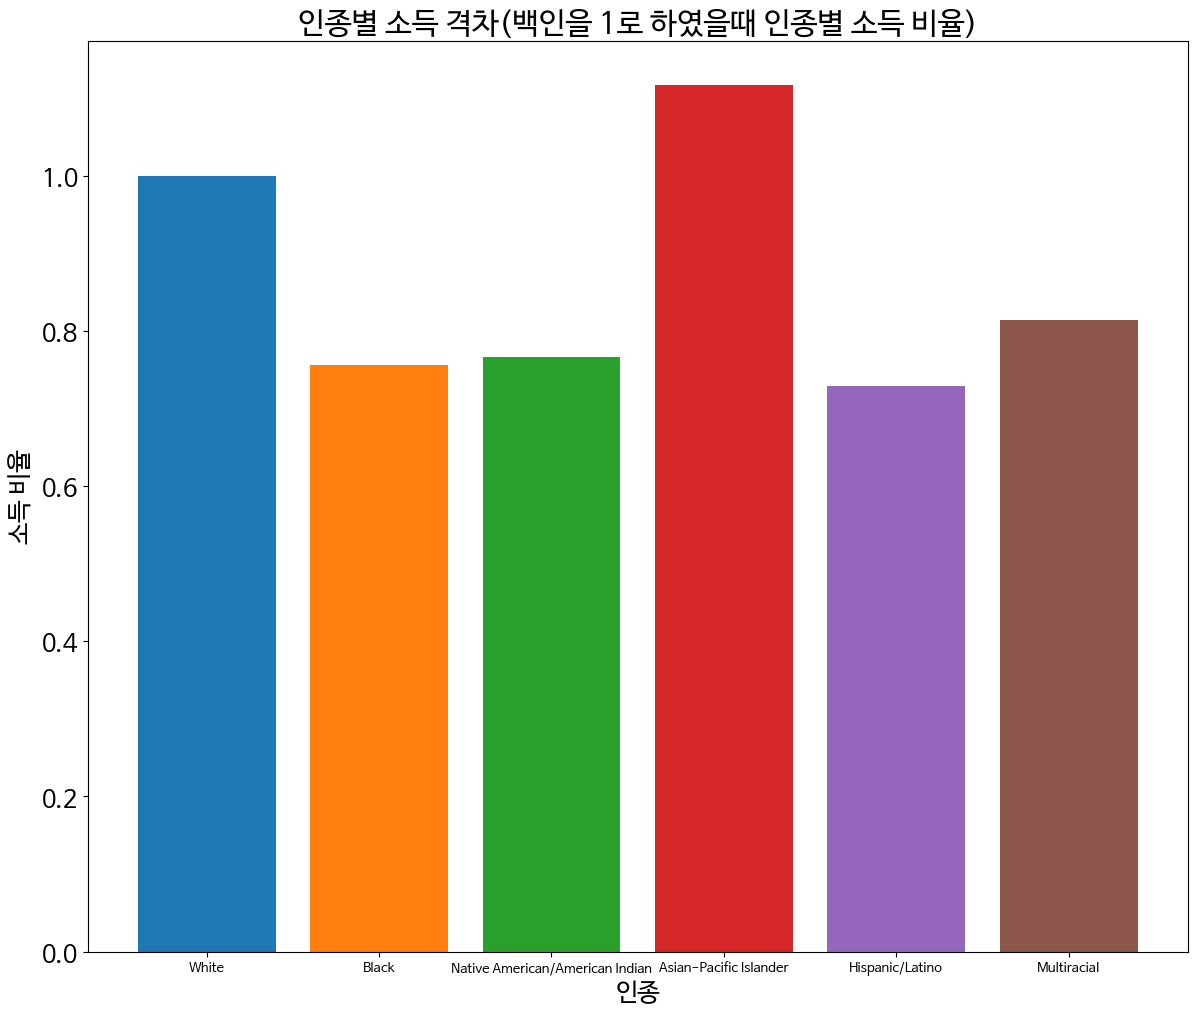

In [22]:
#만약 findfont: font family '폰트 이름' not found. 에러가 뜨면 해당 함수를 호출하세요.
#물론 fname 변수, name, update()함수 는 알맞게 수정 후 실행해야 합니다

 # ttf 파일이 저장되어 있는 경로
filePath = 'C:\\학교 과제\\알피코\\신송고\\MBTI_WordCloud\\NanumBarunGothic.ttf'
 # 이 폰트의 원하는 이름 설정
fontName = 'NanumBarunGothic'
def ApplyFont(filepath, fontName):
    fe = font_manager.FontEntry(fname=filePath, name = fontName)                  
    font_manager.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
    plt.rcParams.update({'font.size': 18, 'font.family': fontName}) # 폰트 설정

#폰트 적용
ApplyFont(filePath, fontName)

plt.rc('font', family = fontName)
plt.figure(figsize=(12, 10))
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']
plt.bar(dataType, earnings_Disparity, color=colors)
# 레이아웃 자동 조정
plt.tight_layout()
plt.xticks(fontsize=9.5)
plt.xlabel('인종')
plt.ylabel('소득 비율')
plt.title('인종별 소득 격차(백인을 1로 하였을때 인종별 소득 비율)')
plt.savefig('인종 별 소득격차.png', format='png')
plt.show()

#print("프로그램 실행 완료")